# GHZ State Preparation

## Braid Sequence Preparation

In [1]:
"""
Prepare GHZ state
"""
import os
import pickle
import numpy as np

from tools.braid_matrix_calculator import error_distance, get_matrix, leakage_error
from tools.transformer import uncouple, time_mirror, uncouple_all
import braiding_generators.fib_multi_qudits as multi_q
from tools.matrix_tools import extract, combine_diag
from tools.cplot import cplot, scale

tol = 0.01

# precomputed sequences
cnot_seq =  {'sigma': [3, 4, 4, 3, 3, 4, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3, 3, 2, 4,
                       3, 3, 4, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 2,
                       4, 3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3,
                       4, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 2, 4, 3, 
                       3, 4, 2, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3, 3, 2, 2,
                       3, 1, 2, 2, 1, 3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 1, 2,
                       2, 1, 3, 2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3,
                       2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1,
                       3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2,
                       1, 3, 2, 2, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 3, 3, 2, 
                       4, 3, 3, 4, 2, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3, 3,
                       2, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3,
                       3, 2, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 2, 4,
                       3, 3, 4, 4, 3, 3, 4, 2, 3, 3, 2, 4, 3, 3, 4, 2, 3, 3, 2,
                       4, 3, 3, 4, 2, 3, 3, 2, 4, 3, 3, 4, 4, 3], 
             'power': [1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1,
                       1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 
                       1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 
                       -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1,
                       1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1,
                       1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
                       -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1,
                       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                       1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 
                       -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                       1, 1, 1, 1, -1, -1, -1, -1, -1, -1]}


hadamard_seq = {'sigma': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
                'power': [-4, 2, -2, 2, -2, -2, 2, -4, -2, 2, 2, -2, -2]}

In [2]:
nb_qubits = 5
nb_anyons_per_qubit = 3

In [3]:
# Apply Hadamard sequence on the last qubit
H_ = {}
H_['power'] = hadamard_seq['power']
H_['sigma'] = [n+nb_anyons_per_qubit*(nb_qubits-1) for n in hadamard_seq['sigma']]

In [4]:
# Express Hadamard sequence in the standard format
H = {}
H['power'] = []
H['sigma'] = []
for i, p in enumerate(H_['power']):

    sigma = H_['sigma'][i]
    if p < 0:
        power = -1
    else:
        power = 1

    for _ in range(abs(p)):
        H['power'].append(power)
        H['sigma'].append(sigma)

In [5]:
# Sequence of braids for consecutive CNOT gates
CNOTs = []
for q in range(2, nb_qubits+1):
    # CNOT q, q-1
    CNOT = {}
    CNOT['power'] = cnot_seq['power']
    CNOT['sigma'] = [n+nb_anyons_per_qubit*(nb_qubits-q) for n in cnot_seq['sigma']]
    CNOTs.append(CNOT)

In [6]:
# Define the whole sequence (concatenate Hadamard with CNOTs)
sequence = {}
sequence['power'] = H['power']
sequence['sigma'] = H['sigma']
for q in range(nb_qubits-1):
    sequence['power'] = sequence['power'] + CNOTs[q]['power']
    sequence['sigma'] = sequence['sigma'] + CNOTs[q]['sigma']

## Braiding Matrix

In [7]:
# check if necessary directories are available
if not os.path.isdir(f"bin"):
    os.mkdir(f"bin")

if not os.path.isdir(f"images"):
    os.mkdir(f"images")

In [8]:
# Calculate sigmas of 5 qubits (3 anyons per qubit)
try:
    with open(f"bin/basis-{nb_qubits}q-{nb_anyons_per_qubit*nb_qubits}a.pickle", "rb") as file:
        basis = pickle.load(file)

    with open(f"bin/SIG-{nb_qubits}q-{nb_anyons_per_qubit*nb_qubits}a.pickle", "rb") as file:
        SIG = pickle.load(file)

except FileNotFoundError:
    SIG = {}
    for index in range(nb_anyons_per_qubit*nb_qubits-1):
        n = index + 1
        SIG[n] = {}
        gen = multi_q.braiding_generator(n, nb_qubits, nb_anyons_per_qubit-1, show=False)

        SIG[n][1] = np.array(gen[0])
        SIG[n][-1] = np.array(np.linalg.inv(gen[0]))

    basis = gen[1]
    with open(f"bin/basis-{nb_qubits}q-{nb_anyons_per_qubit*nb_qubits}a.pickle", "wb") as file:
        pickle.dump(basis, file)
    with open(f"bin/SIG-{nb_qubits}q-{nb_anyons_per_qubit*nb_qubits}a.pickle", "wb") as file:
        pickle.dump(SIG, file)

In [9]:
# Calculate matrix representation of C-NOT braiding sequance
w = get_matrix(sequence, sigma=SIG)

The size of the approximated GHZ preparation circuit unitary matrix

In [10]:
w.shape

(987, 987)

## Basis

In [11]:
len(basis)

987

In [12]:
basis

[{'qudits': [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0]], 'roots': [0, 0, 0, 0]},
 {'qudits': [[0, 1], [0, 1], [1, 0], [1, 0], [1, 0]], 'roots': [0, 0, 0, 0]},
 {'qudits': [[1, 1], [0, 1], [1, 0], [1, 0], [1, 0]], 'roots': [0, 0, 0, 0]},
 {'qudits': [[0, 1], [1, 1], [1, 0], [1, 0], [1, 0]], 'roots': [0, 0, 0, 0]},
 {'qudits': [[1, 1], [1, 1], [1, 0], [1, 0], [1, 0]], 'roots': [0, 0, 0, 0]},
 {'qudits': [[0, 1], [1, 0], [0, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[1, 1], [1, 0], [0, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[0, 1], [1, 0], [1, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[1, 1], [1, 0], [1, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[1, 0], [0, 1], [0, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[1, 0], [1, 1], [0, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[1, 0], [0, 1], [1, 1], [1, 0], [1, 0]], 'roots': [1, 0, 0, 0]},
 {'qudits': [[1, 0], [1, 1], [1, 1], [1, 0], [1, 0]], 'roots': [

### Exact GHZ gate

In [13]:
from tools.pauli import *

In [14]:
GHZ = np.kron(np.kron(np.kron(ID, ID), ID), CNOT) @ np.kron(np.kron(np.kron(ID, ID), CNOT), ID) @ np.kron(np.kron(np.kron(ID, CNOT), ID), ID) @ np.kron(np.kron(np.kron(CNOT, ID), ID), ID) @ np.kron(np.kron(np.kron(np.kron(HADAMARD, ID), ID), ID), ID)

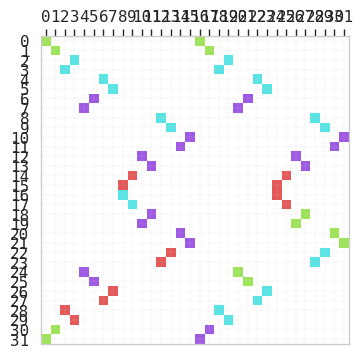

In [15]:
cplot(GHZ)

## Sectors

In [16]:
# 0 and 1 sectors
nb_0 = 0
for base in basis:
    if base['roots'][-1] == 0:
        nb_0 += 1

print('0 sector states :', nb_0)
print('1 sector states :', len(basis) - nb_0)

0 sector states : 377
1 sector states : 610


In [17]:
all_sectors = []
all_sizes = []
for base in basis:
    if base['roots'] not in all_sectors:
        all_sectors.append(base['roots'])
        all_sizes.append(1)
    else:
        all_sizes[-1] += 1

In [18]:
all_sectors

[[0, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [1, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 1, 0],
 [0, 1, 1, 0],
 [1, 1, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 1],
 [0, 1, 0, 1],
 [1, 1, 0, 1],
 [0, 0, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 1, 1],
 [1, 1, 1, 1]]

In [19]:
def bits_range(nb_qubits):
    bits = []
    fbits = []
    for _ in range(nb_qubits):
        bits.append(0)
        fbits.append(1)
    yield bits
    
    while bits != fbits:
        for b, bit in enumerate(bits):
            if not bit:
                bits[b] += 1
                break
            else:
                bits[b] = 0
        yield bits

In [20]:
from braiding_generators.fib_qudit import check_state

In [21]:
sectors = []
for base in basis:
    if check_state(base['roots']):
        if base['roots'] not in sectors:
            sectors.append(base['roots'])

### Computational Sectors

In [22]:
sectors

[[1, 0, 1, 0],
 [0, 1, 1, 0],
 [1, 1, 1, 0],
 [0, 1, 0, 1],
 [1, 1, 0, 1],
 [1, 0, 1, 1],
 [0, 1, 1, 1],
 [1, 1, 1, 1]]

## Approximated gates

In [23]:
## Extract the matrix in computational space
result_gates = [np.zeros([2**nb_qubits, 2**nb_qubits]) * (1 + 0j) for sec in sectors]

for sec, sector in enumerate(sectors):
    bases = []
    row = 0
    for bb, base in enumerate(basis):
        if all([
            base["qudits"][q][nb_anyons_per_qubit-2] == 1 for q in range(nb_qubits)
        ]) and base['roots'] == sector:
            column = 0
            bases.append(base)
            for cc, case in enumerate(basis):
                if all([
                    case["qudits"][q][nb_anyons_per_qubit-2] == 1 for q in range(nb_qubits)
                ]) and case['roots'] == sector:
                    result_gates[sec][row, column] = w[bb, cc]
                    column += 1
            row += 1

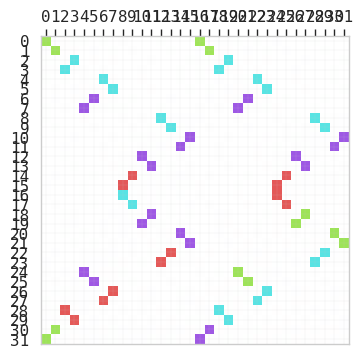

[{'qudits': [[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[1, 1], [0, 1], [0, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[0, 1], [1, 1], [0, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[1, 1], [1, 1], [0, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[0, 1], [0, 1], [1, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[1, 1], [0, 1], [1, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[0, 1], [1, 1], [1, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[1, 1], [1, 1], [1, 1], [0, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[0, 1], [0, 1], [0, 1], [1, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[1, 1], [0, 1], [0, 1], [1, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[0, 1], [1, 1], [0, 1], [1, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[1, 1], [1, 1], [0, 1], [1, 1], [0, 1]], 'roots': [1, 1, 1, 1]},
 {'qudits': [[0, 1], [0, 1], [1, 1], [1, 1], [0, 1]], 'roots': [

In [24]:
cplot(result_gates[-1], )
bases

## Entanglement 

In [25]:
import qutip as qp
from scipy.linalg import logm

In [26]:
state_0 = qp.Qobj([[1] if i==0 else [0] for i in range(2**nb_qubits)], dims=[[2 for i in range(nb_qubits)], [1]])

vnes = []
for sec, sector in enumerate(sectors):
    vnes.append([])
    operation = qp.Qobj(result_gates[sec], dims=[[2 for i in range(nb_qubits)], [2 for i in range(nb_qubits)]])
    state = operation * state_0
    rho = state * state.dag()
    
    for q in range(nb_qubits):
        rho_q = rho.ptrace(q)
        vne = qp.entropy_vn(rho_q)
        vnes[-1].append(vne)

In [27]:
# von Neumann Entanglement Entropies 
# Entropy [sector][qubit] = vnes [sector][qubit]
vnes

[[0.6931155030605227,
  0.693116503653687,
  0.6931165002122838,
  0.6931164882784489,
  0.6931157445446224],
 [0.6931157770420081,
  0.69311650805522,
  0.6931164961115244,
  0.6931164926695258,
  0.6931154757604301],
 [0.6931160897977289,
  0.6931168208108465,
  0.6931168163273347,
  0.6931168118482323,
  0.6931160694049517],
 [0.6931157445481826,
  0.6931159553980436,
  0.6931159390716708,
  0.693115935630793,
  0.6931149187197609],
 [0.693116752319197,
  0.6931169631684546,
  0.693116951236021,
  0.6931169467517907,
  0.693116204309536],
 [0.6931163512589317,
  0.6931170822714973,
  0.6931170788293968,
  0.6931170668935465,
  0.693116323161161],
 [0.6931161160868656,
  0.6931163905756363,
  0.6931163786539482,
  0.6931163752125145,
  0.6931153583029789],
 [0.6931164395220208,
  0.6931167140107457,
  0.6931167095328985,
  0.6931167050545084,
  0.693115962610934]]

In [28]:
# Exact von Neumann Entropy = ln(2)

state_0 = qp.Qobj([[1] if i==0 else [0] for i in range(2**nb_qubits)], dims=[[2 for i in range(nb_qubits)], [1]])

exact_vnes = []
operation = qp.Qobj(GHZ, dims=[[2 for i in range(nb_qubits)], [2 for i in range(nb_qubits)]])
state = operation * state_0
rho = state * state.dag()

for q in range(nb_qubits):
    rho_q = rho.ptrace(q)
    vne = qp.entropy_vn(rho_q)
    exact_vnes.append(vne)

In [29]:
exact_vnes

[0.6931471805599454,
 0.6931471805599454,
 0.6931471805599454,
 0.6931471805599454,
 0.6931471805599454]

### Entanglement Entropy Difference

In [30]:
for sec, sector in enumerate(sectors):
    diff = np.log(2 * np.ones(5)) - np.array(vnes[sec])
    print(sector, diff)
    string = ""
    for df in diff:
        string = string + r"\centering" + f"${round(df*10**5, 3)}" + r"\cdot 10^{-5}$ &"
    print()
    print(string)
    print()

[1, 0, 1, 0] [3.16774994e-05 3.06769063e-05 3.06803477e-05 3.06922815e-05
 3.14360153e-05]

\centering$3.168\cdot 10^{-5}$ &\centering$3.068\cdot 10^{-5}$ &\centering$3.068\cdot 10^{-5}$ &\centering$3.069\cdot 10^{-5}$ &\centering$3.144\cdot 10^{-5}$ &

[0, 1, 1, 0] [3.14035179e-05 3.06725047e-05 3.06844484e-05 3.06878904e-05
 3.17047995e-05]

\centering$3.14\cdot 10^{-5}$ &\centering$3.067\cdot 10^{-5}$ &\centering$3.068\cdot 10^{-5}$ &\centering$3.069\cdot 10^{-5}$ &\centering$3.17\cdot 10^{-5}$ &

[1, 1, 1, 0] [3.10907622e-05 3.03597491e-05 3.03642326e-05 3.03687117e-05
 3.11111550e-05]

\centering$3.109\cdot 10^{-5}$ &\centering$3.036\cdot 10^{-5}$ &\centering$3.036\cdot 10^{-5}$ &\centering$3.037\cdot 10^{-5}$ &\centering$3.111\cdot 10^{-5}$ &

[0, 1, 0, 1] [3.14360118e-05 3.12251619e-05 3.12414883e-05 3.12449292e-05
 3.22618402e-05]

\centering$3.144\cdot 10^{-5}$ &\centering$3.123\cdot 10^{-5}$ &\centering$3.124\cdot 10^{-5}$ &\centering$3.124\cdot 10^{-5}$ &\centering$3.226\cdo

## Errors and Leakage

In [31]:
state_0 = np.zeros(2**nb_qubits)
state_0[0] = 1

print('Sector      ', 'Leakage')
leakages = []
errors = []
for sec, sector in enumerate(sectors):
    vnes.append([])
    state = result_gates[sec] @ state_0
    leakages.append((1 - np.sum(state.conj() @ state)).real)
    print(sector, fr"${round((leakages[-1]*10**6).real, 3)}", r"10^{-6}$")
    
    amp = np.dot(state.conj(), (GHZ @ state_0))
    errors.append(1 - amp.conj() * amp)

Sector       Leakage
[1, 0, 1, 0] $6.799 10^{-6}$
[0, 1, 1, 0] $6.799 10^{-6}$
[1, 1, 1, 0] $7.846 10^{-6}$
[0, 1, 0, 1] $4.921 10^{-6}$
[1, 1, 0, 1] $8.294 10^{-6}$
[1, 0, 1, 1] $8.721 10^{-6}$
[0, 1, 1, 1] $6.381 10^{-6}$
[1, 1, 1, 1] $7.464 10^{-6}$


In [32]:
print('Sector         ', 'Leakage')
[(sectors[i], leakages[i]) for i in range(8)]

Sector          Leakage


[([1, 0, 1, 0], 6.7991334747885546e-06),
 ([0, 1, 1, 0], 6.799141256341734e-06),
 ([1, 1, 1, 0], 7.846132767164171e-06),
 ([0, 1, 0, 1], 4.9206482976016375e-06),
 ([1, 1, 0, 1], 8.294273963094234e-06),
 ([1, 0, 1, 1], 8.721414712864473e-06),
 ([0, 1, 1, 1], 6.38092161298065e-06),
 ([1, 1, 1, 1], 7.4636593394572515e-06)]

In [33]:
print('Sector         ', 'Error')
[(sectors[i], errors[i].real) for i in range(8)]

Sector          Error


[([1, 0, 1, 0], 5.699289550398223e-05),
 ([0, 1, 1, 0], 5.6992895505092456e-05),
 ([1, 1, 1, 0], 5.6424068846649966e-05),
 ([0, 1, 0, 1], 6.460993042001206e-05),
 ([1, 1, 0, 1], 5.530085055382994e-05),
 ([1, 0, 1, 1], 5.2419511153756204e-05),
 ([0, 1, 1, 1], 6.031184476718021e-05),
 ([1, 1, 1, 1], 5.971126348358613e-05)]

In [34]:
import matplotlib.pyplot as plt

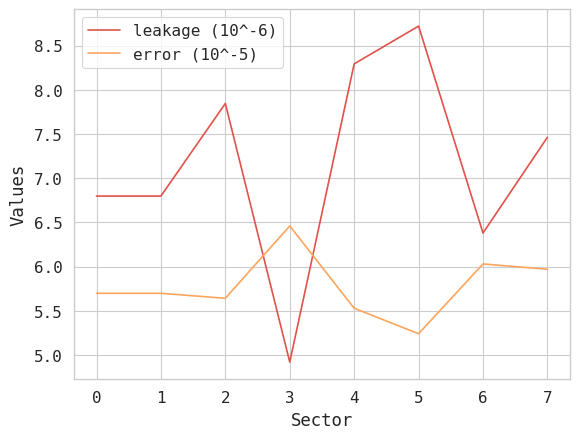

In [35]:
plt.plot(np.array(leakages)*10**6, label="leakage (10^-6)")
plt.plot(np.array(errors).real*10**5, label="error (10^-5)")
plt.xlabel("Sector")
plt.ylabel("Values")
plt.legend()
plt.show()